###분석

- Word Cloud를 통해서 중요 단어 확인

= Naive Bayes 모델을 통한 리뷰의 별점 예측

In [1]:
! pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./yelp.csv', index_col = 0)

In [5]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [7]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [8]:
# 불필요한 컬럼 제거
data.drop(['review_id','user_id','business_id','date'], axis = 1, inplace = True)

In [9]:
data.head()

,stars,text,useful,funny,cool
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,5,This has become our go-to sushi place. The sus...,0,0,0
1139855,1,I was very disappointed with the hotel. The re...,2,1,1
3997153,5,Love this place - super amazing - staff here i...,0,0,0
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [11]:
data['text_length'] = data['text'].apply(len)

In [12]:
data.head() 

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,5,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,1,I was very disappointed with the hotel. The re...,2,1,1,663
3997153,5,Love this place - super amazing - staff here i...,0,0,0,141
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455


In [13]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


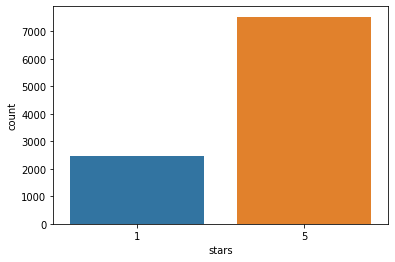

In [15]:
#별점 분포
sns.countplot(data['stars'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


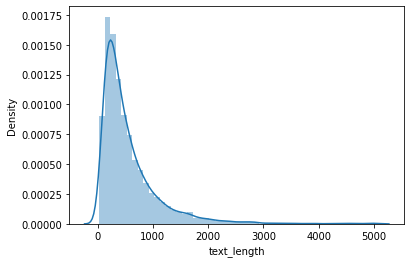

In [16]:
#텍스트 길이 분포 확인
sns.distplot(data['text_length'])

In [17]:
#변수별 상관관계 확인
data.corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


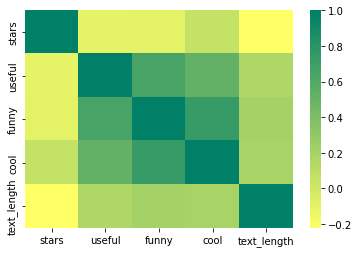

In [18]:
sns.heatmap(data.corr(), cmap = 'summer_r')

### 불필요한 기호제거

In [19]:
import string

In [20]:
#함수 만들기
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)
    return new_s

In [21]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [25]:
#리스트 컴프리헨션 이용
data['text'] = data['text'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [26]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,This has become our goto sushi place The sushi...,0,0,0,377
1139855,1,I was very disappointed with the hotel The res...,2,1,1,663
3997153,5,Love this place super amazing staff here is ...,0,0,0,141
4262000,5,Thank you Dana Having dyed my hair black previ...,0,0,0,455


### 상투적인 단어 제거하기

In [27]:
from nltk.corpus import stopwords

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
data['text'] = data['text'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])

In [30]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[become, goto, sushi, place, sushi, always, fr...",0,0,0,377
1139855,1,"[disappointed, hotel, restaurants, good, booke...",2,1,1,663
3997153,5,"[love, place, super, amazing, staff, always, f...",0,0,0,141
4262000,5,"[thank, dana, dyed, hair, black, previously, k...",0,0,0,455


### 단어 등장 빈도 확인하기

In [32]:
#모든 단어를 하나의 리스트로 통합
word_split = []

for i in range(len(data)):
    for j in data.iloc[i]['text']:
        word_split.append(j)

In [33]:
len(word_split)

542773

In [34]:
from nltk.probability import FreqDist

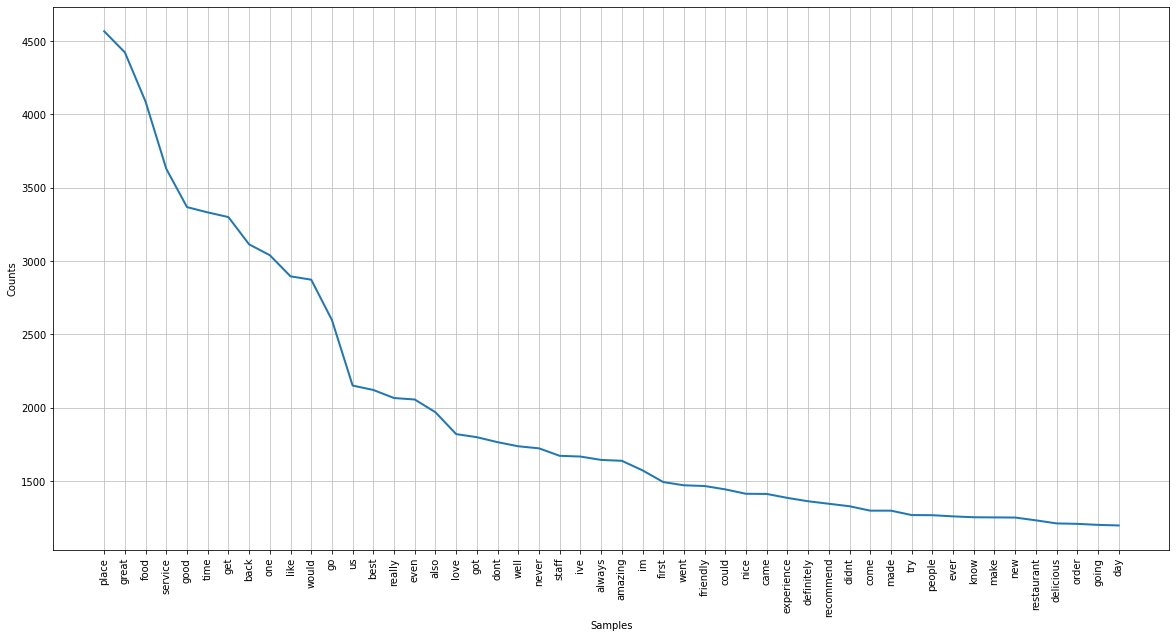

In [35]:
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(50)

### World Cloud 만들기

**활용사례**

- Finding Pain Points

   - 불만사항이 적힌 텍스트들에서 주로 어떤 사항이 불만요소로 나오는지 확인

- SEO

   = 관련된 주요 키워드를 확인하여, 사이트를 검색 결과에 더욱 잘 노출시키도록 개선
   

In [36]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

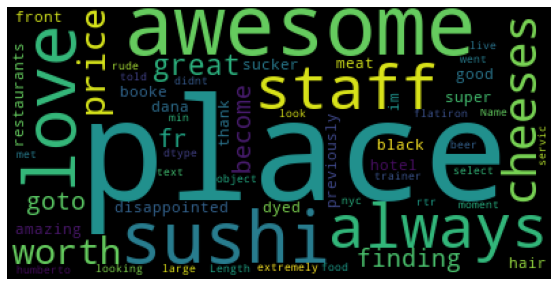

In [37]:
wc =WordCloud().generate(str(data['text']))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

### 1점과 5점 Text에 대해 각각 Word Cloud만들기

In [40]:
good = data[data['stars'] ==5]['text']
bad = data[data['stars']==1]['text']


(-0.5, 399.5, 199.5, -0.5)

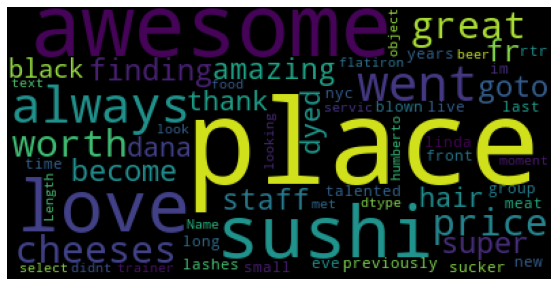

In [41]:
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

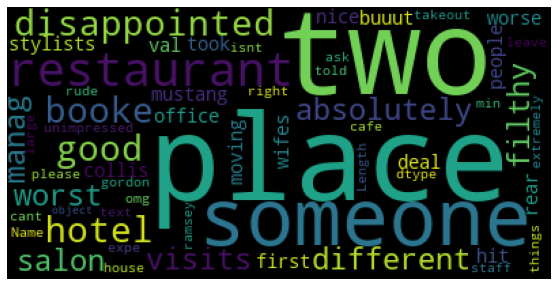

In [42]:
wc= WordCloud().generate(str(bad))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

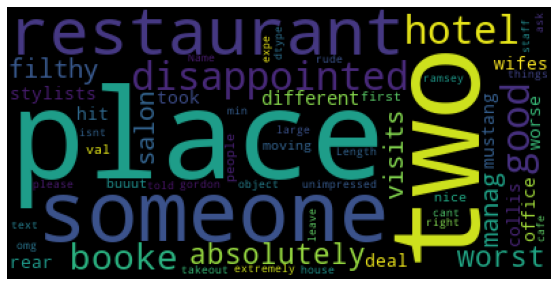

In [43]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

### 나이브 베이즈 모델을 통한 예측 모델 구축

- 각 변수가 독립적이라고 가정

- n < p, 유용하게 쓰임

- 딥러닝을 제외하면, 텍스트 데이터에 가장 적합

   - 스팸 메일 필터링

   - 감정 분석


- 식

   - P(A|B) = {P(B|A) * P(A)} / P(B)

   - P(B|A) : 사후 확률

   - P(A) : 사전 확률

### 모듈 및 데이터 로딩


In [44]:
import numpy as np
import pandas as pd


In [45]:
data = pd.read_csv('./yelp.csv', index_col=0)

### 독립변수(X) 와 종속변수(y)로 분리

In [46]:
X = data['text']
y = data['stars']

### Count Vectorizer로 데이터 변환

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer()

In [49]:
cv.fit(X)

CountVectorizer()

In [50]:
X = cv.transform(X)

### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)

### Naive Bayes 알고리즘으로 모델링

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
model = MultinomialNB()

In [60]:


model.fit(X_train, y_train)

MultinomialNB()

In [61]:

pred = model.predict(X_test)

### 예측 결과 평가하기(Naive Bayes)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
accuracy_score(y_test, pred)

0.9265

In [66]:
confusion_matrix(y_test, pred)

array([[ 421,   65],
       [  82, 1432]])

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.84      0.87      0.85       486
           5       0.96      0.95      0.95      1514

    accuracy                           0.93      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.93      0.93      0.93      2000



### Random Forest로 모델링(비교 목적)


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(max_depth = 10, n_estimators=1000)

In [73]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [74]:
pred2 =rf.predict(X_test)

### 예측결과 평가하기(Random Forest)

In [76]:
accuracy_score(y_test, pred2)

0.788

In [77]:
confusion_matrix(y_test,pred2)

array([[  65,  421],
       [   3, 1511]])

In [78]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           1       0.96      0.13      0.23       486
           5       0.78      1.00      0.88      1514

    accuracy                           0.79      2000
   macro avg       0.87      0.57      0.56      2000
weighted avg       0.82      0.79      0.72      2000

